In [79]:
import pandas as pd
import sqlite3 

In [80]:
data = pd.read_csv (r'Data.csv')   
df = pd.DataFrame(data, columns= ['Name','Position','City'])
df2 = pd.DataFrame(data, columns= ['Post_available','City'])
#simtd = pd.DataFrame(data, columns= ['Position'])
data = pd.read_csv (r'City.csv')   
df3 = pd.DataFrame(data, columns= ['City_ID','City_name'])
#print(df)
#print(df2)
#print(df3)
#print(simtd)

In [81]:
data_with_string_city = pd.read_csv (r'Data2.csv')   
dfs = pd.DataFrame(data_with_string_city, columns= ['Name','Position','City'])
df2s = pd.DataFrame(data_with_string_city, columns= ['Post_available','City'])

In [83]:
connection = sqlite3.connect("job_city_test.db") 
crsr = connection.cursor() 
#Creating table's along with word embeddings
crsr.execute('CREATE TABLE city_id (CID int(1) PRIMARY KEY, CITY nvarchar(50))')
crsr.execute('CREATE TABLE test_data (NAME nvarchar(50),POSITION nvarchar(50), CID int(1), FOREIGN KEY (CID) REFERENCES city_id(CID))')
crsr.execute('CREATE TABLE name_post_city (NAME nvarchar(50),POSITION nvarchar(50), CID int(1), FOREIGN KEY (CID) REFERENCES city_id(CID))')
crsr.execute('CREATE TABLE post_city (POST_AVAILABLE nvarchar(50), CID int(1), FOREIGN KEY (CID) REFERENCES city_id(CID))')
connection.commit()

#Creating table's for string similarity joins
crsr.execute('CREATE TABLE city_job (Name nvarchar(50) ,Position nvarchar(50), CITY nvarchar(50))')
crsr.execute('CREATE TABLE job_with_city (Position nvarchar(50), CITY nvarchar(50))')
connection.commit()


In [85]:
#Table of Embedding
df3.to_sql('city_id', connection, if_exists='replace', index = False)
crsr.execute('''SELECT * FROM city_id''')
for row in crsr.fetchall():
    print (row)

(0, 'Victoria')
(1, 'Vancover')
(2, 'Mumbai')
(3, 'Delhi')
(4, 'Pune')
(5, 'Ottawa')
(6, 'Torronto')
(7, 'New York')
(8, 'Los Angeles')


In [86]:
#Table 1 consisting of name, position and city
df.to_sql('name_post_city', connection, if_exists='replace', index = False)
crsr.execute('''SELECT * FROM name_post_city''')
for row in crsr.fetchall():
    print (row)

('Tom', 'Manager', 0)
('Henry', 'Developer', 1)
('Bush', 'Engineer', 1)
('Harry', 'Project Lead', 2)
('Simon', 'Team Lead', 2)
('Ram', 'Developer', 1)
('Bharat', 'CEO', 3)
('Laxman', 'CTO', 4)
('Krishna', 'Waiter', 2)
('Harshal', 'Content Writer', 6)
('Rommy', 'Devops', 5)
('Josh', 'COO', 3)
('Jelly', 'Developer', 2)
('Akash', 'Developer', 5)
('Ritul', 'Engineer', 7)
('Daisy', 'Team Lead', 4)
('Rosie', 'Engineer', 2)
('Alexa', 'CEO', 1)
('Talia', 'Content Writer', 4)
('Sita', 'Manager', 6)
('Erik', 'Manager', 7)
('Ethan', 'Project Lead', 5)
('Katrina', 'Public Relation', 4)
('Deepika', 'Developer', 3)
('John', 'Devops', 2)
('Jerry', 'COO', 1)
('Elon', 'Team Lead', 5)
('Angelina', 'Engineer', 7)
('Selena', 'Manager', 5)


In [89]:
#Table 2 consisting of position and city
df2.to_sql('post_city', connection, if_exists='replace', index = False)
crsr.execute('''SELECT * FROM post_city''')
for row in crsr.fetchall():
    print (row)


('Manager', 0)
('Developer', 1)
('Developer', 1)
('Manager', 2)
('Engineer', 2)
('CEO', 1)
('Engineer', 3)
('COO', 4)
('Team Lead', 2)
('Developer', 6)
('Engineer', 5)
('Project Lead', 3)
('Engineer', 2)
('Developer', 5)
('Engineer', 7)
('CEO', 4)
('COO', 2)
('Content Writer', 1)
('Developer', 4)
('Team Lead', 6)
('Project Lead', 7)
('Engineer', 5)
('Engineer', 4)
('Developer', 3)
('Project Lead', 2)
('Project Lead', 1)
('Developer', 5)
('Engineer', 7)
('Manager', 5)


In [90]:
#Join using Position and Post Available Columns
crsr.execute('''SELECT * FROM name_post_city
JOIN post_city
ON name_post_city.POSITION = post_city.POST_AVAILABLE''')
for row in crsr.fetchall():
    print (row)

('Tom', 'Manager', 0, 'Manager', 0)
('Tom', 'Manager', 0, 'Manager', 2)
('Tom', 'Manager', 0, 'Manager', 5)
('Henry', 'Developer', 1, 'Developer', 1)
('Henry', 'Developer', 1, 'Developer', 1)
('Henry', 'Developer', 1, 'Developer', 3)
('Henry', 'Developer', 1, 'Developer', 4)
('Henry', 'Developer', 1, 'Developer', 5)
('Henry', 'Developer', 1, 'Developer', 5)
('Henry', 'Developer', 1, 'Developer', 6)
('Bush', 'Engineer', 1, 'Engineer', 2)
('Bush', 'Engineer', 1, 'Engineer', 2)
('Bush', 'Engineer', 1, 'Engineer', 3)
('Bush', 'Engineer', 1, 'Engineer', 4)
('Bush', 'Engineer', 1, 'Engineer', 5)
('Bush', 'Engineer', 1, 'Engineer', 5)
('Bush', 'Engineer', 1, 'Engineer', 7)
('Bush', 'Engineer', 1, 'Engineer', 7)
('Harry', 'Project Lead', 2, 'Project Lead', 1)
('Harry', 'Project Lead', 2, 'Project Lead', 2)
('Harry', 'Project Lead', 2, 'Project Lead', 3)
('Harry', 'Project Lead', 2, 'Project Lead', 7)
('Simon', 'Team Lead', 2, 'Team Lead', 2)
('Simon', 'Team Lead', 2, 'Team Lead', 6)
('Ram', 'D

In [112]:
#searching jobs for engineers:
#converting the word to vector and then calculating there similarities
#choosing values greater than 0.7 and then using join query to show only those jobs
words = [
    'engineer',
    'developer',
    'manager',
    'ceo',
    'cto',
    'waiter'
]
search_post = "engineer"
similarity_list = []
i = 0
for word in enumerate(words):
    if model.similarity(search_post,words[i]) > 0.3:
        similarity_list.append(words[i])
    i = i + 1
print(similarity_list)
#crsr.execute("INSERT INTO test_data SELECT * FROM name_post_city where POSITION = '%s'" %similarity_list[1].capitalize())
#crsr.execute("SELECT * FROM test_data")

#crsr.execute("SELECT * FROM test_data JOIN post_city ON test_data.POSITION = post_city.POST_AVAILABLE")
#for row in crsr.fetchall():
#    print (row)
#i = model.similarity(search_post,words[0])
#print(i)

['engineer', 'developer', 'manager']


In [46]:
#Table for string similarity joins
#dfs.to_sql('city_job', connection, if_exists='replace', index = False)
#df2s.to_sql('job_with_city', connection, if_exists='replace', index = False)
crsr.execute('''SELECT * FROM city_job''')
for row in crsr.fetchall():
    print (row)

('Tom', 'Manager', 'Victoria')
('Henry', 'Developer', 'Vancover')
('Bush', 'Engineer', 'Vancover')
('Harry', 'Project Lead', 'Mumbai')
('Simon', 'Team Lead', 'Mumbai')
('Ram', 'Developer', 'Vancover')
('Bharat', 'CEO', 'Delhi')
('Laxman', 'CTO', 'Pune')
('Krishna', 'Waiter', 'Mumbai')
('Harshal', 'Content Writer', 'Torronto')
('Rommy', 'Devops', 'Ottawa')
('Josh', 'COO', 'Delhi')
('Jelly', 'Developer', 'Mumbai')
('Akash', 'Developer', 'Ottawa')
('Ritul', 'Engineer', 'New York')
('Daisy', 'Team Lead', 'Pune')
('Rosie', 'Engineer', 'Mumbai')
('Alexa', 'CEO', 'Vancover')
('Talia', 'Content Writer', 'Pune')
('Sita', 'Manager', 'Torronto')
('Erik', 'Manager', 'New York')
('Ethan', 'Project Lead', 'Ottawa')
('Katrina', 'Public Relation', 'Pune')
('Deepika', 'Developer', 'Delhi')
('John', 'Devops', 'Mumbai')
('Jerry', 'COO', 'Vancover')
('Elon', 'Team Lead', 'Ottawa')
('Angelina', 'Engineer', 'New York')
('Selena', 'Manager', 'Ottawa')


In [47]:
crsr.execute('''SELECT * FROM job_with_city''')
for row in crsr.fetchall():
    print (row)

('Manager', 'Victoria')
('Developer', 'Vancover')
('Developer', 'Vancover')
('Manager', 'Mumbai')
('Engineer', 'Mumbai')
('CEO', 'Vancover')
('Engineer', 'Delhi')
('COO', 'Pune')
('Team Lead', 'Mumbai')
('Developer', 'Torronto')
('Engineer', 'Ottawa')
('Project Lead', 'Delhi')
('Engineer', 'Mumbai')
('Developer', 'Ottawa')
('Engineer', 'New York')
('CEO', 'Pune')
('COO', 'Mumbai')
('Content Writer', 'Vancover')
('Developer', 'Pune')
('Team Lead', 'Torronto')
('Project Lead', 'New York')
('Engineer', 'Ottawa')
('Engineer', 'Pune')
('Developer', 'Delhi')
('Project Lead', 'Mumbai')
('Project Lead', 'Vancover')
('Developer', 'Ottawa')
('Engineer', 'New York')
('Manager', 'Ottawa')


In [48]:
crsr.execute('''SELECT * FROM city_job
JOIN job_with_city
ON city_job.CITY = job_with_city.CITY''')
for row in crsr.fetchall():
    print (row)

('Tom', 'Manager', 'Victoria', 'Manager', 'Victoria')
('Henry', 'Developer', 'Vancover', 'CEO', 'Vancover')
('Henry', 'Developer', 'Vancover', 'Content Writer', 'Vancover')
('Henry', 'Developer', 'Vancover', 'Developer', 'Vancover')
('Henry', 'Developer', 'Vancover', 'Developer', 'Vancover')
('Henry', 'Developer', 'Vancover', 'Project Lead', 'Vancover')
('Bush', 'Engineer', 'Vancover', 'CEO', 'Vancover')
('Bush', 'Engineer', 'Vancover', 'Content Writer', 'Vancover')
('Bush', 'Engineer', 'Vancover', 'Developer', 'Vancover')
('Bush', 'Engineer', 'Vancover', 'Developer', 'Vancover')
('Bush', 'Engineer', 'Vancover', 'Project Lead', 'Vancover')
('Harry', 'Project Lead', 'Mumbai', 'COO', 'Mumbai')
('Harry', 'Project Lead', 'Mumbai', 'Engineer', 'Mumbai')
('Harry', 'Project Lead', 'Mumbai', 'Engineer', 'Mumbai')
('Harry', 'Project Lead', 'Mumbai', 'Manager', 'Mumbai')
('Harry', 'Project Lead', 'Mumbai', 'Project Lead', 'Mumbai')
('Harry', 'Project Lead', 'Mumbai', 'Team Lead', 'Mumbai')
('Sim

In [49]:
#Loading pre-trained Word2Vec Embeddings
from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# Access vectors for specific words with a keyed lookup:
#vector = model['easy']
# Looking at the shape of the vector (300,)
#vector.shape
# Looking at the model
#print (model)
# Printing the vector
#print (vector)

KeyboardInterrupt: 

In [ ]:
#Method to find similar words
model.most_similar('delhi')

In [ ]:
#Another approach for getting Word2Vec pretrained model
#import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')
#try:
#    vec_victoria = wv['victoria']
#except KeyError:
#    print("Victoria is not present in the model")
#print(vec_victoria)

# Cosine similarity function 
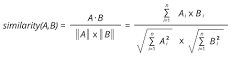

In [ ]:
#Cosine similarity function
def cos_sim(a, b):
    """Takes 2 vectors a, b and returns the cosine similarity according 
    to the definition of the dot product
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

#np.linalg.norm : It gives us the Frobenius norm, it requires that we cycle through all matrix entries, add their squares, and then take the square root. This involves an outer loop to traverse the rows and an inner loop that forms the sum of the squares of the entries of a row. % Input: m × n matrix A. % Output: the Frobenius norm.

# Approaches used in training Word2Vec for our data

## Approach 1

In [4]:
from gensim.models import word2vec

words = [
    'Victoria',
    'Vancover',
    'Mumbai',
    'Delhi',
    'Pune',
    'Ottawa',
    'Torronto'

]

for i, sentence in enumerate(words):
    tokenized= []
    for word in sentence.split(' '):
        word = word.lower()
        tokenized.append(word)
    words[i] = tokenized

model = word2vec.Word2Vec(words, workers = 5, size = 6, min_count = 1, window = 1, sg = 0) #training model with our vocabulary
similar_word = model.wv.most_similar('torronto')
print("Most common word to pune is: {}".format(similar_word))
vec_pune = model['pune']
print(vec_pune)


Most common word to pune is: [('delhi', 0.32261234521865845), ('vancover', 0.30881112813949585), ('victoria', 0.13869747519493103), ('mumbai', -0.021151244640350342), ('ottawa', -0.3006308376789093), ('pune', -0.3563171625137329)]
[-0.01231048 -0.05092046  0.01438878 -0.05083634  0.01543465  0.01076549]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
import numpy as np
from collections import defaultdict

## Randomly initialise
getW1 = [[0.236, -0.962, 0.686, 0.785, -0.454, -0.833, -0.744, 0.677, -0.427, -0.066],
        [-0.907, 0.894, 0.225, 0.673, -0.579, -0.428, 0.685, 0.973, -0.070, -0.811],
        [-0.576, 0.658, -0.582, -0.112, 0.662, 0.051, -0.401, -0.921, -0.158, 0.529],
        [0.517, 0.436, 0.092, -0.835, -0.444, -0.905, 0.879, 0.303, 0.332, -0.275],
        [0.859, -0.890, 0.651, 0.185, -0.511, -0.456, 0.377, -0.274, 0.182, -0.237],
        [0.368, -0.867, -0.301, -0.222, 0.630, 0.808, 0.088, -0.902, -0.450, -0.408],
        [0.728, 0.277, 0.439, 0.138, -0.943, -0.409, 0.687, -0.215, -0.807, 0.612],
        [0.593, -0.699, 0.020, 0.142, -0.638, -0.633, 0.344, 0.868, 0.913, 0.429],
        [0.447, -0.810, -0.061, -0.495, 0.794, -0.064, -0.817, -0.408, -0.286, 0.149]]

getW2 = [[-0.868, -0.406, -0.288, -0.016, -0.560, 0.179, 0.099, 0.438, -0.551],
        [-0.395, 0.890, 0.685, -0.329, 0.218, -0.852, -0.919, 0.665, 0.968],
        [-0.128, 0.685, -0.828, 0.709, -0.420, 0.057, -0.212, 0.728, -0.690],
        [0.881, 0.238, 0.018, 0.622, 0.936, -0.442, 0.936, 0.586, -0.020],
        [-0.478, 0.240, 0.820, -0.731, 0.260, -0.989, -0.626, 0.796, -0.599],
        [0.679, 0.721, -0.111, 0.083, -0.738, 0.227, 0.560, 0.929, 0.017],
        [-0.690, 0.907, 0.464, -0.022, -0.005, -0.004, -0.425, 0.299, 0.757],
        [-0.054, 0.397, -0.017, -0.563, -0.551, 0.465, -0.596, -0.413, -0.395],
        [-0.838, 0.053, -0.160, -0.164, -0.671, 0.140, -0.149, 0.708, 0.425],
        [0.096, -0.995, -0.313, 0.881, -0.402, -0.631, -0.660, 0.184, 0.487]]

class word2vec():

    def __init__(self):
        self.n = settings['n']
        self.lr = settings['learning_rate']
        self.epochs = settings['epochs']
        self.window = settings['window_size']

    def generate_training_data(self, settings, corpus):
        # Find unique word counts using dictonary
        word_counts = defaultdict(int)
        for row in corpus:
            for word in row:
                word_counts[word] += 1
        ########################################################################################################################################################
        # print(word_counts)																																#
        #########################################################################################################################################################

        ## How many unique words in vocab? 9
        self.v_count = len(word_counts.keys())
        #########################
        # print(self.v_count)	#
        # 9						#
        #########################

        # Generate Lookup Dictionaries (vocab)
        self.words_list = list(word_counts.keys())
        #################################################################################################
        # print(self.words_list)																		#
        #################################################################################################
        
        # Generate word:index
        self.word_index = dict((word, i) for i, word in enumerate(self.words_list))
        #############################################################################################################################
        # print(self.word_index)																									#
        #############################################################################################################################
        # Generate index:word
        self.index_word = dict((i, word) for i, word in enumerate(self.words_list))
        #############################################################################################################################
        # print(self.index_word)																									#
        #############################################################################################################################

        training_data = []

        # Cycle through each sentence in corpus
        for sentence in corpus:
            sent_len = len(sentence)
            
            # Cycle through each word in sentence
            for i, word in enumerate(sentence):
                # Convert target word to one-hot
                w_target = self.word2onehot(sentence[i])
                
                # Cycle through context window
                w_context = []

                # Note: window_size 2 will have range of 5 values
                for j in range(i - self.window, i + self.window+1):
                    # Criteria for context word 
                    # 1. Target word cannot be context word (j != i)
                    # 2. Index must be greater or equal than 0 (j >= 0) - if not list index out of range
                    # 3. Index must be less or equal than length of sentence (j <= sent_len-1) - if not list index out of range 
                    if j != i and j <= sent_len-1 and j >= 0:
                        # Append the one-hot representation of word to w_context
                        w_context.append(self.word2onehot(sentence[j]))
                        # print(sentence[i], sentence[j]) 
                        #########################
                        
                # training_data contains a one-hot representation of the target word and context words
                #################################################################################################
                # Example:																						#
                # [Target] natural, [Context] language, [Context] processing									#
                # print(training_data)																			#
                # [[[1, 0, 0, 0, 0, 0, 0, 0, 0], [[0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0]]]]	#
                #################################################################################################
                training_data.append([w_target, w_context])

        return np.array(training_data)

    def word2onehot(self, word):
        # word_vec - initialise a blank vector
        word_vec = [0 for i in range(0, self.v_count)] # Alternative - np.zeros(self.v_count)
        #############################
        # print(word_vec)			#
        # [0, 0, 0, 0, 0, 0, 0, 0]	#
        #############################
        
        # Get ID of word from word_index
        word_index = self.word_index[word]
        
        # Change value from 0 to 1 according to ID of the word
        word_vec[word_index] = 1

        return word_vec

    def train(self, training_data):
        # Initialising weight matrices
        # np.random.uniform(HIGH, LOW, OUTPUT_SHAPE)
        # https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.uniform.html
        self.w1 = np.array(getW1)
        self.w2 = np.array(getW2)
        # self.w1 = np.random.uniform(-1, 1, (self.v_count, self.n))
        # self.w2 = np.random.uniform(-1, 1, (self.n, self.v_count))
        
        # Cycle through each epoch
        for i in range(self.epochs):
            # Intialise loss to 0
            self.loss = 0
            # Cycle through each training sample
            # w_t = vector for target word, w_c = vectors for context words
            for w_t, w_c in training_data:
                # Forward pass
                # 1. predicted y using softmax (y_pred) 2. matrix of hidden layer (h) 3. output layer before softmax (u)
                y_pred, h, u = self.forward_pass(w_t)
                #########################################
                # print("Vector for target word:", w_t)	#
                # print("W1-before backprop", self.w1)	#
                # print("W2-before backprop", self.w2)	#
                #########################################

                # Calculate error
                # 1. For a target word, calculate difference between y_pred and each of the context words
                # 2. Sum up the differences using np.sum to give us the error for this particular target word
                EI = np.sum([np.subtract(y_pred, word) for word in w_c], axis=0)
                #########################
                # print("Error", EI)	#
                #########################

                # Backpropagation
                # We use SGD to backpropagate errors - calculate loss on the output layer 
                self.backprop(EI, h, w_t)
                #########################################
                #print("W1-after backprop", self.w1)	#
                #print("W2-after backprop", self.w2)	#
                #########################################

                # Calculate loss
                # There are 2 parts to the loss function
                # Part 1: -ve sum of all the output +
                # Part 2: length of context words * log of sum for all elements (exponential-ed) in the output layer before softmax (u)
                # Note: word.index(1) returns the index in the context word vector with value 1
                # Note: u[word.index(1)] returns the value of the output layer before softmax
                self.loss += -np.sum([u[word.index(1)] for word in w_c]) + len(w_c) * np.log(np.sum(np.exp(u)))
                
                #############################################################
                # Break if you want to see weights after first target word 	#
                # break 													#
                #############################################################
            print('Epoch:', i, "Loss:", self.loss)

    def forward_pass(self, x):
        # x is one-hot vector for target word, shape - 9x1
        # Run through first matrix (w1) to get hidden layer - 10x9 dot 9x1 gives us 10x1
        h = np.dot(x, self.w1)
        # Dot product hidden layer with second matrix (w2) - 9x10 dot 10x1 gives us 9x1
        u = np.dot(h, self.w2)
        # Run 1x9 through softmax to force each element to range of [0, 1] - 1x8
        y_c = self.softmax(u)
        return y_c, h, u

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    def backprop(self, e, h, x):
        # https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.outer.html
        # Column vector EI represents row-wise sum of prediction errors across each context word for the current center word
        # Going backwards, we need to take derivative of E with respect of w2
        # h - shape 10x1, e - shape 9x1, dl_dw2 - shape 10x9
        # x - shape 9x1, w2 - 10x9, e.T - 9x1
        dl_dw2 = np.outer(h, e)
        dl_dw1 = np.outer(x, np.dot(self.w2, e.T))
        ########################################
        # print('Delta for w2', dl_dw2)			#
        # print('Hidden layer', h)				#
        # print('np.dot', np.dot(self.w2, e.T))	#
        # print('Delta for w1', dl_dw1)			#
        #########################################

        # Update weights
        self.w1 = self.w1 - (self.lr * dl_dw1)
        self.w2 = self.w2 - (self.lr * dl_dw2)

    # Get vector from word
    def word_vec(self, word):
        w_index = self.word_index[word]
        v_w = self.w1[w_index]
        return v_w

    # Input vector, returns nearest word(s)
    def vec_sim(self, word, top_n):
        v_w1 = self.word_vec(word)
        word_sim = {}
        
        for i in range(self.v_count):
            # Find the similary score for each word in vocab
            v_w2 = self.w1[i]
            theta_sum = np.dot(v_w1, v_w2)
            theta_den = np.linalg.norm(v_w1) * np.linalg.norm(v_w2)
            theta = theta_sum / theta_den

            word = self.index_word[i]
            word_sim[word] = theta

        words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)
    
        for word, sim in words_sorted[:top_n]:
            print(word, sim)

#####################################################################
parameters = {
    'window_size': 2,			# context window +- center word
    'n': 3,					# dimensions of word embeddings, also refer to size of hidden layer
    'epochs': 100,				# number of training epochs
    'learning_rate': 0.01		# learning rate
}

text = "manager developer engineer coo cto devops waiter publicerelation ceo"
# Note the .lower() as upper and lowercase does not matter in our implementation
# ['victoria'], ['vancover'], ['seattle'], ['ottawa'], ['torronto'], ['delhi'], ['mumbai'], ['pune'], ['hyderabad']
corpus = [[word.lower() for word in text.split()]]
#corpus = ['manager', 'developer', 'engineer', 'coo', 'ceo', 'cto', 'devops','waiter', 'publicrelation']
# Initialise object
w2v = word2vec()

# Numpy ndarray with one-hot representation for [target_word, context_words]
training_data = w2v.generate_training_data(parameters, corpus)

# Training
w2v.train(training_data)

# Get vector for word
word = "engineer"
vec = w2v.word_vec(word)
print(word, vec)

# Find similar words
w2v.vec_sim("engineer", 9)

## Approach 2

In [3]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['manager', 'developer', 'engineer', 'coo', 'ceo', 'cto', 'devops','waiter']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

word = "ceo"
vec = model[word]
print(word, vec)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


<Figure size 640x480 with 1 Axes>

ceo [ 0.00392687  0.00285157  0.00316023  0.00218278  0.00386624  0.00483577
  0.00388181  0.0049685  -0.00357427  0.00056859 -0.00244217 -0.00416643
 -0.00404455  0.0003604   0.00146157  0.00254166 -0.00397233  0.00111126
  0.00254193  0.00122321 -0.00461816  0.00141313 -0.00142672 -0.00206697
  0.00128734  0.00351928  0.0005896   0.0008037  -0.00336654 -0.00378686
 -0.00391033  0.00425872 -0.00102734  0.00253187  0.0002024  -0.00032146
  0.00165645 -0.00281547  0.00405022 -0.00100023 -0.00215281  0.00356334
 -0.00059763  0.00149083 -0.00309885 -0.00141403  0.00361276 -0.00480521
 -0.00388123  0.00257528  0.00066394 -0.00164597 -0.00389977  0.00053806
 -0.00128954 -0.00023807  0.00136327  0.00412403 -0.00271184  0.00346889
 -0.00484666  0.00186571 -0.00385584 -0.00395292 -0.0039279   0.00295919
 -0.00475924 -0.00264436  0.00460744  0.00213726  0.00203879 -0.0005992
  0.00287748 -0.00281019 -0.00189341 -0.00249692  0.00222688  0.00360027
  0.00319472 -0.00292861 -0.00015167  0.00447211

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
